In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Unemployment in India.csv to Unemployment in India.csv


In [4]:
df=pd.read_csv("Unemployment in India.csv")


In [5]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [9]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


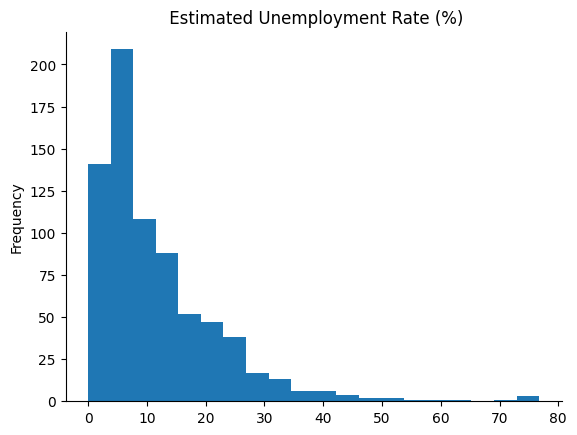

In [15]:
from matplotlib import pyplot as plt
df[' Estimated Unemployment Rate (%)'].plot(kind='hist', bins=20, title=' Estimated Unemployment Rate (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

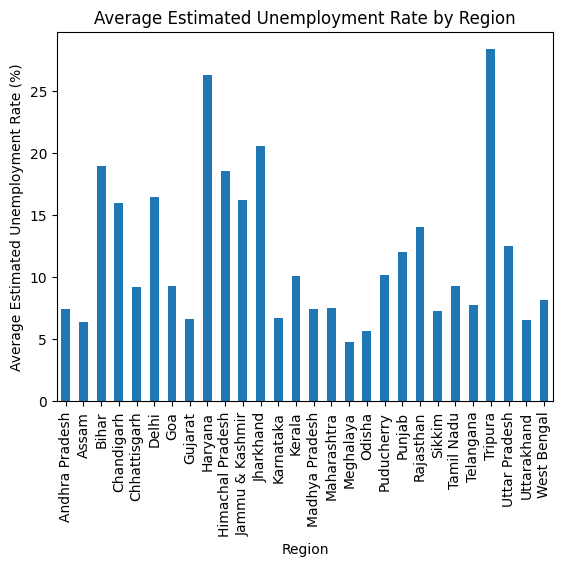

In [11]:
import matplotlib.pyplot as plt
df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().plot(kind='bar')
plt.title('Average Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.show()

In [17]:
pd.DataFrame(df.iloc[:,3])

,Estimated Unemployment Rate (%)
0,3.65
1,3.05
2,3.75
3,3.32
4,5.17
...,...
749,7.55
750,6.67
751,15.63
752,15.22


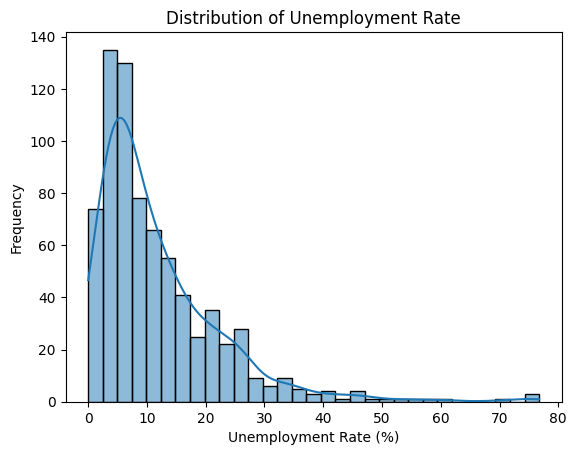

In [19]:
sns.histplot(df.iloc[:,3], kde=True)
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

In [20]:
df.drop(['Region', ' Frequency','Area'], axis=1, inplace=True)

In [21]:
df[' Date'] = pd.to_datetime(df[' Date'])

In [22]:
df.set_index(' Date', inplace=True)

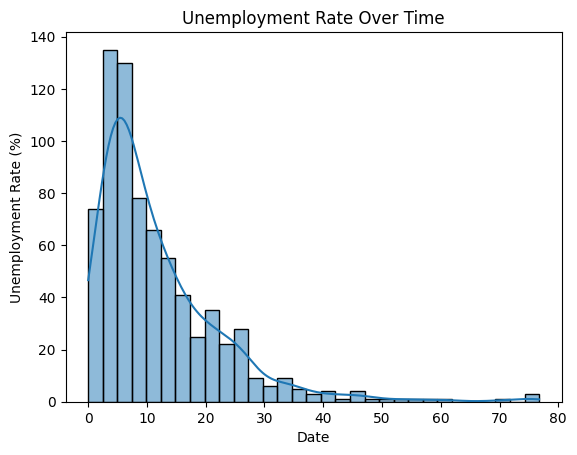

In [23]:
sns.histplot(df[' Estimated Unemployment Rate (%)'], kde=True)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()

In [24]:
X = df.drop(' Estimated Unemployment Rate (%)', axis=1)
y = df[' Estimated Unemployment Rate (%)']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
train_p = model.predict(X_train)
test_p = model.predict(X_test)

In [28]:
print("Training Mean Squared Error:", mean_squared_error(y_train, train_p))
print("Testing Mean Squared Error:", mean_squared_error(y_test, test_p))
print("Training R2 Score:", r2_score(y_train, train_p))
print("Testing R2 Score:", r2_score(y_test, test_p))

Training Mean Squared Error: 101.70159014287688
Testing Mean Squared Error: 139.07514553297295
Training R2 Score: 0.052121713234500655
Testing R2 Score: 0.03938840314253944
